In [1]:
import math
import pandas as pd
import numpy as np
import glob
from transformation import *


During the following sections, the transformed dataset will be loaded and an exploratory data analysis will be perfromed accordinaly. 

# Count Missing Values

In [2]:
eda_list = ["null_value_count", "content_stats",
            "table_404", "status_count",
            "host_count", "endpoint_count", 
            "unique_host_count", "daily_request_count"
                ]

In [3]:
# load the null value counts csv files
dir = 'output/'
files = glob.glob(dir + eda_list[0] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_null = pd.concat(df_list, ignore_index=True)

In [4]:
# presenting the result of null value counts by columns
df_null

,host,method,endpoint,protocol,status,content_size,time
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0


Based on the result above, there is no missing values for this log dataset. Therefore, there is no data cleaning required for this dataset. 

# Content Size

In [5]:
# load the content statistic summary csv files
files = glob.glob(dir + eda_list[1] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_content = pd.concat(df_list, ignore_index=True)
# present the content size statitics results 
df_content


,min_content_size,max_content_size,mean_content_size,std_content_size,count_content_size
0,1,60000,29998.128581,17325.135613,997270
1,1,60000,30027.038738,17312.435335,1295441
2,1,60000,30004.129986,17320.180332,1485400
3,1,60000,30016.985034,17310.855466,786311
4,1,60000,30008.090978,17326.054068,1434518
5,1,60000,30009.544632,17323.891753,1066186
6,1,60000,29980.003541,17306.313095,1242710
7,1,60000,30019.250010,17316.277513,1127409
8,1,60000,29994.168003,17321.681868,1361396
9,1,60000,30012.661885,17316.503507,909309


In [6]:
# aggregate the results
count = sum(df_content['count_content_size'])
result = {"min" : [min(df_content['min_content_size'])],
             "max" : [max(df_content['max_content_size'])],
             "mean" : [int(sum(df_content['mean_content_size']*df_content['count_content_size']/count))],
             "std" : [math.sqrt(sum((df_content['std_content_size']**2)*df_content['count_content_size'])/count)],
             'count' : [count]
             }
# present the content size statistics results
df_content_stat = pd.DataFrame(result)
df_content_stat

,min,max,mean,std,count
0,1,60000,30006,17319.596738,14117646


## HTTP Status

In [7]:
# load the http status csv files
files = glob.glob(dir + eda_list[3] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_status = pd.concat(df_list, ignore_index=True).groupby('status').sum()
# present the HTTP status count results 
df_status

,count
status,
200,2018735
303,2017320
304,2016347
403,2015289
404,2019651
500,2014756
502,2015548


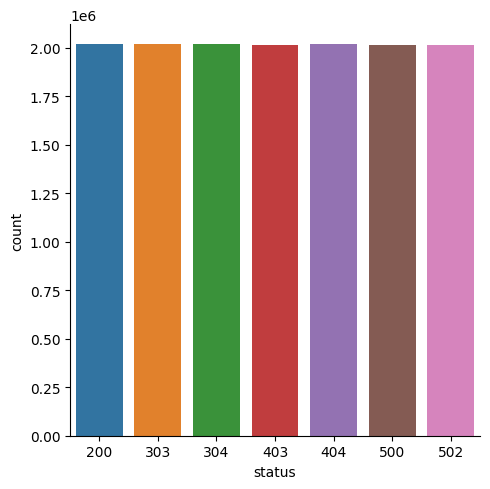

In [8]:
df_status = df_status.reset_index(drop=False)

sns.catplot(x='status', y='count', data=df_status, 
            kind='bar', order=df_status['status'])

## Frequent Host

In [9]:
# load the host count csv files
files = glob.glob(dir + eda_list[4] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_host = pd.concat(df_list, ignore_index=True)
# present the host count results 
df_host.head(5)

,host,count
0,20.44.178.37,1
1,171.181.179.35,1
2,65.5.125.71,1
3,42.167.17.153,1
4,132.161.198.89,1


In [10]:
# obtain the most frequent visited host
df_host.sort_values(by = 'count', ascending = False).head(5)

,host,count
8681834,148.234.85.79,2
11988430,122.131.160.222,2
7227648,1.117.98.106,2
932988,165.107.217.181,2
2138510,174.53.149.49,2


## Top EndPoint 

In [11]:
# load the endpoint count csv files
files = glob.glob(dir + eda_list[5] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_endpoint_weekday = pd.concat(df_list, ignore_index=True)
# present the endpoint count results 
df_endpoint_weekday.head(5)

,endpoint,weekday,count
0,/Archives/edgar/data/0001267332/00011749472100...,4,1175
1,/Archives/edgar/data/879635/000117184322006367...,3,1204
2,/Archives/edgar/data/0000205007/00011455492300...,6,1174
3,/Archives/edgar/data/0001221326/99999999951200...,4,1163
4,/Archives/edgar/data/0000205007/00011455492301...,5,1236


In [12]:
# obtain the most frequent visited endpoint
df_endpoint = df_endpoint_weekday.groupby('endpoint').sum()
df_endpoint.sort_values(by = 'count', ascending = False)['count'].head(5)

endpoint
/Archives/edgar/data/0001260125/000114420419015071/tv516461_10k.htm              94919
/Archives/edgar/data/0001675033/000156459021054728/gecc-10q_20210930.htm         94783
/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g29.jpg          94671
/Archives/edgar/data/0001866295/000110465921080403/tm2117388d5_ex3-32g008.jpg    94659
/Archives/edgar/data/0001468457/000093247112005362/0000932471-12-005362.txt      94650
Name: count, dtype: int64

## Total number of unique host
get the unique host and cout the total number

In [13]:
print('The total number of unique host is: ', len(df_host))

The total number of unique host is:  14115391


## Number of unique daily hosts
Explore the unique host of each day of month

In [14]:
# load the unique host count csv files
files = glob.glob(dir + eda_list[6] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_unique_host = pd.concat(df_list, ignore_index=True).groupby('day').sum()
# present the unique host count for each day of month 
df_unique_host

,count
day,
1,464529
2,463231
3,463971
4,462662
5,464021
6,464117
7,464446
8,463248
9,462999


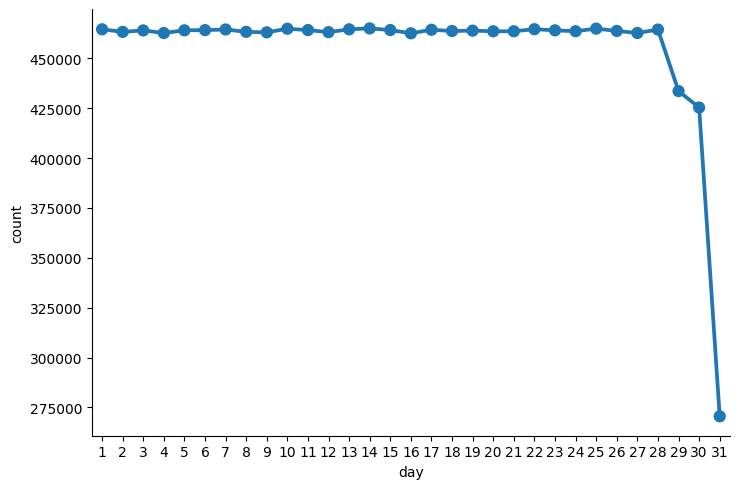

In [15]:
# plot the distribution of daily unique host
df_unique_host = df_unique_host.reset_index(drop=False)
c = sns.catplot(x='day', y='count', 
                data=df_unique_host, 
                kind='point', height=5, 
                aspect=1.5)

## Average Number of daily request per host 
explore the average request number for each host

In [16]:
# load the daily request count csv files
files = glob.glob(dir + eda_list[7] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_daily_request = pd.concat(df_list, ignore_index=True).groupby('day').sum()
# present the unique host count for each day of month 
df_daily_request = df_daily_request.reset_index(drop=False)
df_daily_request 

,day,count
0,1,464531
1,2,463235
2,3,463975
3,4,462667
4,5,464023
5,6,464120
6,7,464448
7,8,463249
8,9,463003
9,10,464824


In [17]:
# join the daily request count table with the daily unique host count table and get the average number of daily request per host
avg_daily_reqests_per_host_df = df_daily_request.merge(df_unique_host, on = 'day', suffixes =('_reqs', '_hosts'))
avg_daily_reqests_per_host_df['avg_reqs'] = avg_daily_reqests_per_host_df['count_reqs']/avg_daily_reqests_per_host_df['count_hosts']
avg_daily_reqests_per_host_df

,day,count_reqs,count_hosts,avg_reqs
0,1,464531,464529,1.000004
1,2,463235,463231,1.000009
2,3,463975,463971,1.000009
3,4,462667,462662,1.000011
4,5,464023,464021,1.000004
5,6,464120,464117,1.000006
6,7,464448,464446,1.000004
7,8,463249,463248,1.000002
8,9,463003,462999,1.000009
9,10,464824,464824,1.000000


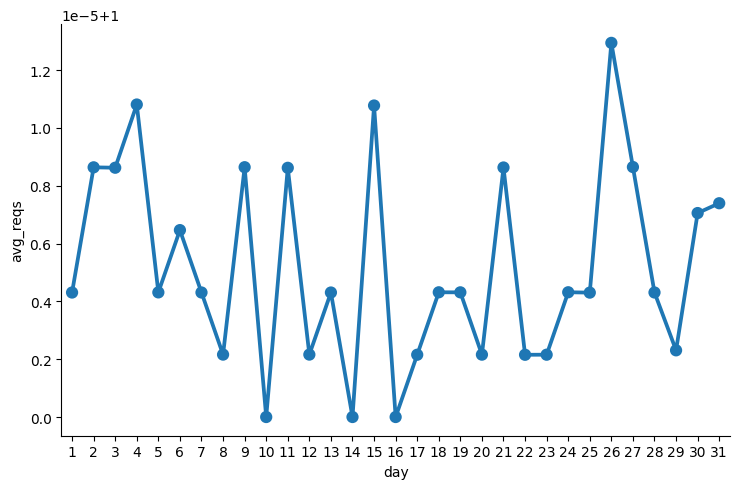

In [18]:
# plot the result
sns.catplot(x='day', y='avg_reqs', 
                data=avg_daily_reqests_per_host_df, 
                kind='point', height=5, aspect=1.5)

## 404 response
Filter the 404 responses 

In [19]:
# load the 404 responses records csv files
files = glob.glob(dir + eda_list[2] + "/*.csv")
df_list = (pd.read_csv(file) for file in files)
df_404 = pd.concat(df_list, ignore_index=True)
# present the 404 error records
df_404.head()

,endpoint,host,day in week,day in month,hour
0,/Archives/edgar/data/0001704304/00009296381900...,196.218.253.73,3,27,11
1,/Archives/edgar/data/0001157987/00011749472100...,204.188.135.47,3,29,9
2,/Archives/edgar/data/0001179929/00011799292300...,137.0.94.238,1,16,12
3,/Archives/edgar/data/0000862341/00009324711200...,181.97.89.215,5,21,15
4,/Archives/edgar/data/0000004281/00011931251706...,41.237.100.140,5,8,18


### Total Count

Get the total cont of the 404 error

In [20]:
print('Total 404 responses are: ', len(df_404))

Total 404 responses are:  2019651


### Top 404 Response Code Endpoints
Filter the 404 responses and aggregate by endpoints

In [21]:
# group the 404 records by endpoint and the count for each weekday
df_404_count = df_404.groupby('endpoint').count()
df_404_count['count'] = df_404_count['hour']
# sort the result and get the top 10
df_404_count.sort_values('count', ascending = False)['count'].head(10)

endpoint
/Archives/edgar/data/921112/000089542110000396/0000895421-10-000396.txt        13697
/Archives/edgar/data/1935285/0001445546-23-001552-index.htm                    13680
/Archives/edgar/data/0001260125/000114420419015062/0001144204-19-015062.txt    13674
/Archives/edgar/data/1027443/000091293802000245/0000912938-02-000245.txt       13664
/Archives/edgar/data/0001608293/000119312514225607/g732497g91g62.jpg           13661
/Archives/edgar/data/0001801390/000121390021017183/s131106_10k.htm             13653
/Archives/edgar/data/0001704304/000092963819000386/0000929638-19-000386.txt    13641
/Archives/edgar/data/19411/0001104659-12-037849.txt                            13627
/Archives/edgar/data/0001795772/000121390021017160/s131128_10k.htm             13627
/Archives/edgar/data/0000008670/000120677422002461/adp4094281-def14a.htm       13626
Name: count, dtype: int64

### Top 404 Response Code Host
Filter the 404 responses and aggregate by host

In [22]:
# group the 404 records by day of the week and the count for each weekday
df_404_host = df_404.groupby('host').count()

df_404_host['count'] = df_404_host['hour']
# sort the result and get the top 10
df_404_host.sort_values('count', ascending = False)['count'].head(10)


host
79.81.233.142     2
213.101.186.64    2
45.32.90.109      2
138.65.189.184    2
111.79.244.14     2
159.45.215.7      2
89.154.157.221    2
84.255.6.228      2
83.55.51.113      2
122.24.145.52     2
Name: count, dtype: int64

### 404 errors per day
Group the 404 records by day of month

In [23]:
# group the 404 records by day of the week and the count for each weekday
df_404_monthday = df_404.groupby('day in month').count()

df_404_monthday['count'] = df_404_monthday['hour']
# sort the result and get the top 10
df_404_monthday['count']

day in month
1     66403
2     66385
3     66548
4     65707
5     66634
6     66323
7     66601
8     66265
9     66203
10    66488
11    66067
12    66333
13    66739
14    66845
15    66489
16    66008
17    66441
18    66231
19    66207
20    66145
21    66451
22    66375
23    66667
24    66571
25    66514
26    66217
27    66212
28    66133
29    61882
30    60973
31    38594
Name: count, dtype: int64

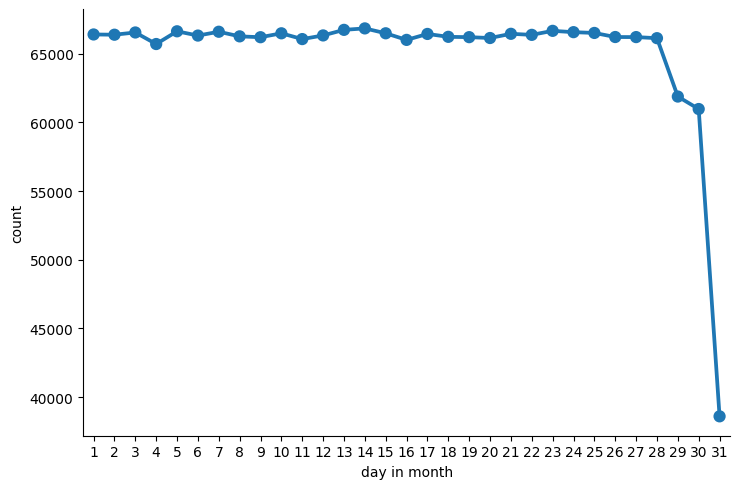

In [24]:
df_404_monthday = df_404_monthday.reset_index(drop=False)
sns.catplot(x='day in month', y='count', 
                data=df_404_monthday, 
                kind='point', height=5, aspect=1.5)

### top 404 responses days
get the top three days with 404 errors

In [25]:
df_top_404_monthday = df_404_monthday.sort_values('count', ascending=False).head(5)
df_top_404_monthday['count'].head(10)

13    66845
12    66739
22    66667
4     66634
6     66601
Name: count, dtype: int64

### distribution of 404 errors count by hour
obtain hour information from time stamp and aggregate by hour

In [26]:
# group the records with 404 erroers by hours and get the count 
df_404_hour_count = df_404.groupby('hour').count()
df_404_hour_count['count'] = df_404_hour_count['day in week']


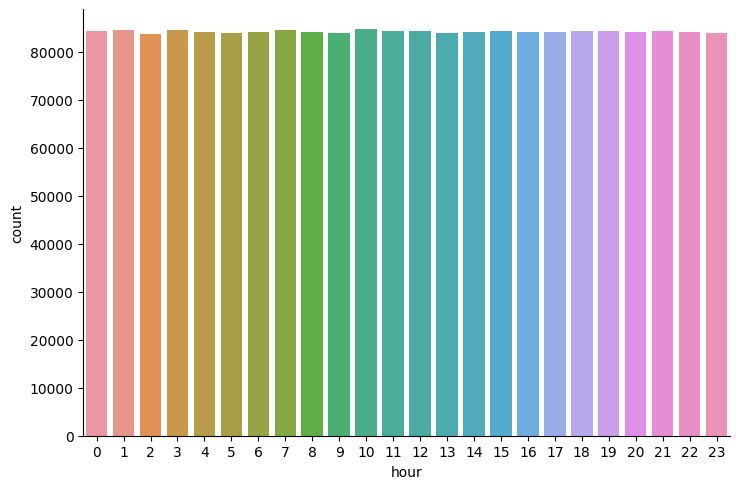

In [27]:
# plot the number of 404 responses by hour
df_404_hour_count = df_404_hour_count.reset_index(drop=False)

c = sns.catplot(x='hour', y='count', 
                data=df_404_hour_count, 
                kind='bar', height=5, aspect=1.5)

## 3.1 Top EndPoints by day of week
group by the day of week and get the end point with the max count for each day


In [28]:
df_endpoint_weekday

,endpoint,weekday,count
0,/Archives/edgar/data/0001267332/00011749472100...,4,1175
1,/Archives/edgar/data/879635/000117184322006367...,3,1204
2,/Archives/edgar/data/0000205007/00011455492300...,6,1174
3,/Archives/edgar/data/0001221326/99999999951200...,4,1163
4,/Archives/edgar/data/0000205007/00011455492301...,5,1236
...,...,...,...
12595,/Archives/edgar/data/1935285/0001445546-23-001...,1,981
12596,/Archives/edgar/data/0001852440/00000000002200...,6,960
12597,/Archives/edgar/data/1826671/00012139002302329...,4,1004
12598,/Archives/edgar/data/0000205007/00011455492300...,2,1031


In [29]:
# obtain the top endpoint of each day
result = df_endpoint_weekday.loc[df_endpoint_weekday.groupby('weekday')['count'].idxmax(), ['weekday', 'endpoint', 'count']].values
pd.DataFrame(result, columns = ['day in a week', 'endpoint', 'count'])

,day in a week,endpoint,count
0,1,/Archives/edgar/data/0001326380/00013263802300...,1501
1,2,/Archives/edgar/data/0001179929/00011799292200...,1479
2,3,/Archives/edgar/data/35315/000175272423067615/...,1495
3,4,/Archives/edgar/data/0001780984/00011931252109...,1532
4,5,/Archives/edgar/data/1935285/0001445546-23-001...,1521
5,6,/Archives/edgar/data/0001671697/00009296381900...,1546
6,7,/Archives/edgar/data/0000004281/00011931251706...,1521


## 3.2 404 status count by day of week
Filter the records with 404 status and groupby the day of week

In [31]:
# group the records with 404 responses by weekday and obtain the count for each group
df_404_weekday = df_404.groupby('day in week').count()
df_404_weekday['count'] = df_404_weekday['hour']
df_404_weekday = df_404_weekday.reset_index(drop=False)
df_404_weekday[['day in week', 'count']]

,day in week,count
0,1,288267
1,2,288047
2,3,287896
3,4,288684
4,5,289487
5,6,288678
6,7,288592


In [32]:
# conver number of week day to name of weekday
week_map = {
  1: 'Sunday', 2: 'Monday', 3 : 'Tuesday', 
  4 : 'Wednesday', 5 : 'Thursday', 
  6 : 'Friday', 7 : 'Saturday'
}

df_404_weekday['weekday'] = df_404_weekday['day in week'].map(week_map)
df_404_weekday[['weekday', 'count']]

,weekday,count
0,Sunday,288267
1,Monday,288047
2,Tuesday,287896
3,Wednesday,288684
4,Thursday,289487
5,Friday,288678
6,Saturday,288592


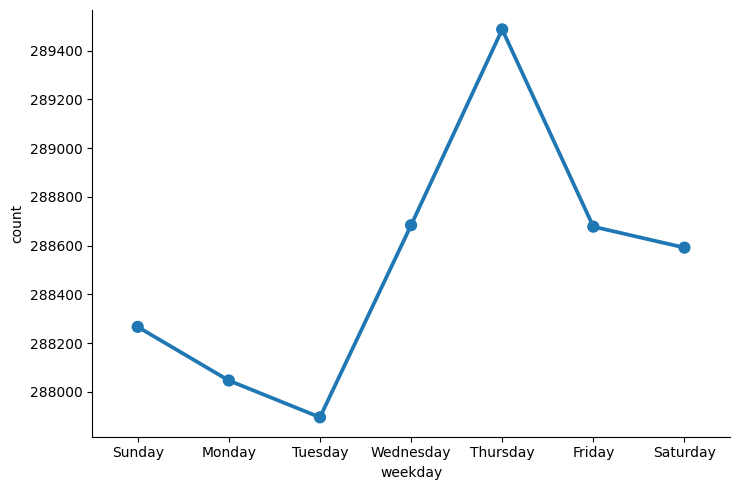

In [33]:
# plot the 404 count by the day of the week
sns.catplot(x='weekday', y='count', 
                data=df_404_weekday, 
                kind='point', height=5, 
                aspect=1.5)